## Instituto Tecnologico de Costa Rica
## Escuela de Computacion 
## Curso: Inteligencia Artificial
## Profesor: Luis Alexander Calvo
## Estudiantes: 
   - Josue Andrey Rojas Vega 2019042245
   - Andrew Gutierrez Castro 2019XXXXXX

### Objetivo

Implementar un programa en python usando numpy y librerias para manejo de imagenes para calcular el SVD y aplicar modificaciones en la imagen dada

Tareas a realizar:

1. Importacion de librerias necesarias

In [65]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Carga de la imagen dada y la pasamos a escala de grises para reducir los vectores de cada pixel a un solo valor

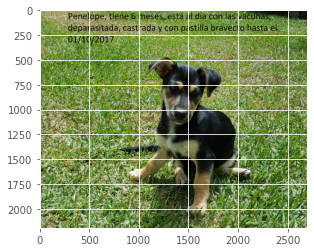

In [66]:
nombreImagen= "imagenUsar"
plt.style.use('ggplot')

image = Image.open(nombreImagen+'.jpg')

plt.imshow(image)
plt.show()

In [67]:
A[0, :10] # mostrando los primeros 10 valores de la fila 0 de la matriz de la imagen

array([[142, 143,  83],
       [148, 149,  89],
       [157, 156,  99],
       [150, 149,  92],
       [132, 131,  75],
       [104, 103,  47],
       [ 87,  86,  30],
       [ 82,  81,  25],
       [100,  99,  43],
       [109, 108,  52]], dtype=uint8)

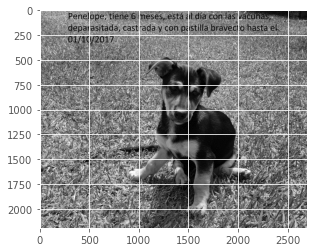

In [68]:
image = image.convert("1")

plt.imshow(image)
plt.show()

3. Carga de la matriz dada la imagen

In [69]:
A = np.asarray(image)
original_shape = A.shape
print(original_shape) # forma de la matriz resultante

(2193, 2697)


4. Obtener los vectores resultantes del calculo del SVD usando numpy

In [70]:
# ref: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
u, s, vh = np.linalg.svd(A, full_matrices=False)
u.shape, s.shape, vh.shape

((2193, 2193), (2193,), (2193, 2697))

5. Calculamos la varianza para saber que tan comprimible es la informacion

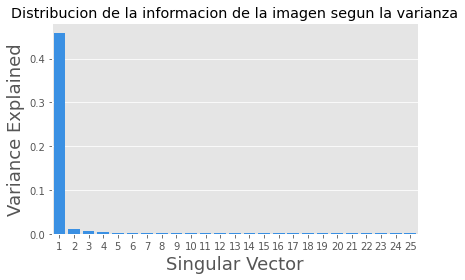

In [71]:
variance = np.round(s**2/np.sum(s**2), decimals=6)

sns.barplot(x=list(range(1, 26)),
            y=variance[0:25], color="dodgerblue")
 
plt.title('Distribucion de la informacion de la imagen segun la varianza')
plt.xlabel('Singular Vector', fontsize=18)
plt.ylabel('Variance Explained', fontsize=18)
plt.tight_layout()
plt.show()

6. Mostramos las diferentes versiones de la imagen usando las cantidades de componentes dados

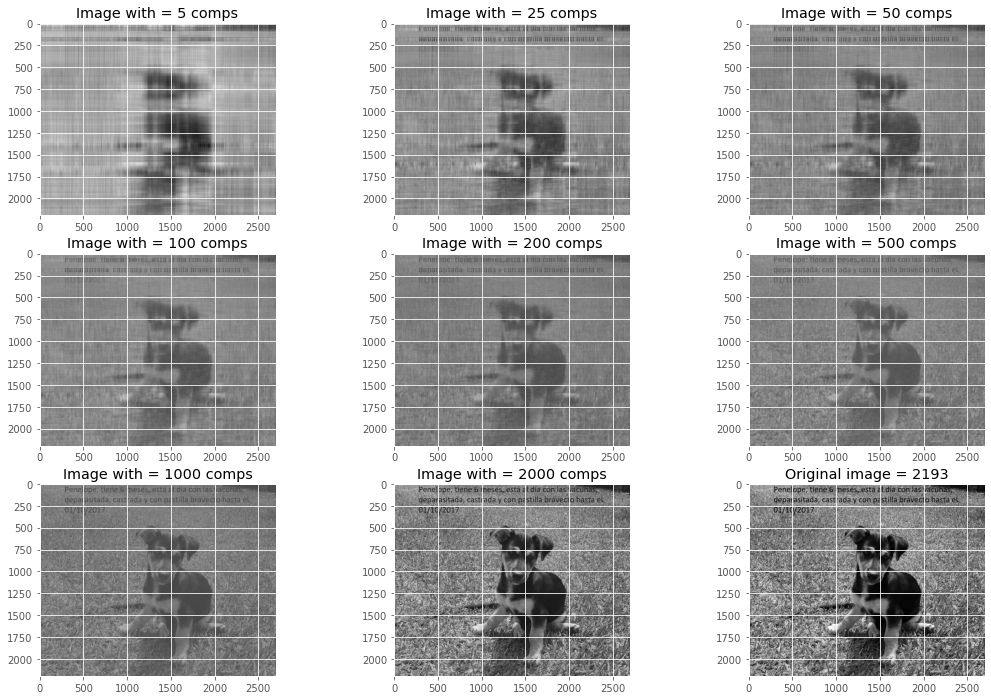

In [73]:
comps = [5, 25, 50, 100, 200, 500, 1000, 2000, 2193] # [3648, 1, 5, 10, 15, 20]
plt.figure(figsize=(18, 12))
 
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ vh[:comps[i], :]
    plt.subplot(3, 3, i+1),
    plt.imshow(low_rank, cmap='gray')
    plt.title(f'Original image = {comps[i]}' if i == len(comps)-1 else f'Image with = {comps[i]} comps')